# Tabular PlayGround Series
---

## Setup & Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

from src import *
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)

## Data

In [2]:
#load and look at the data
train = pd.read_csv('./datasets/tabular_playground_jan_2022/train.csv')
test = pd.read_csv('./datasets/tabular_playground_jan_2022/test.csv')

train = train[:1000].drop(columns="row_id")
test = test[:200].drop(columns="row_id")

print(train.shape)

train.head()

(1000, 5)


,date,country,store,product,num_sold
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


## EDA

In [3]:
# Convert date to datetime
train.date=pd.to_datetime(train.date)
test.date=pd.to_datetime(test.date)

# drop 29th Feb
train.drop(train[(train.date.dt.month==2) & (train.date.dt.day==29)].index, axis=0, inplace=True)

Text(0.5, 1.0, 'num_sold by store')

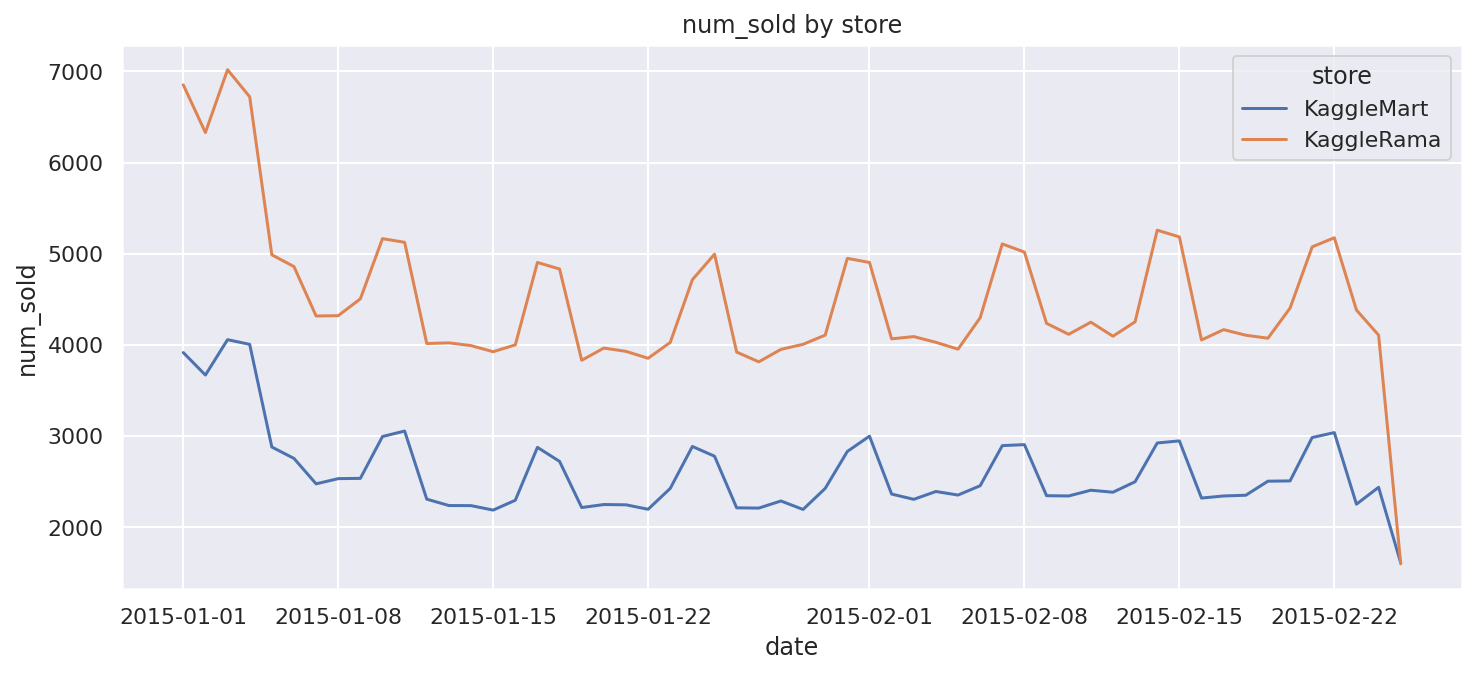

In [4]:
# Figure
plt.figure(figsize=(12,5))

# Groupby
aa=train.groupby(['date','store']).agg(num_sold=('num_sold','sum'))

# Lineplot
sns.lineplot(data=aa, x='date', y='num_sold', hue='store')

# Aesthetics
plt.title('num_sold by store')

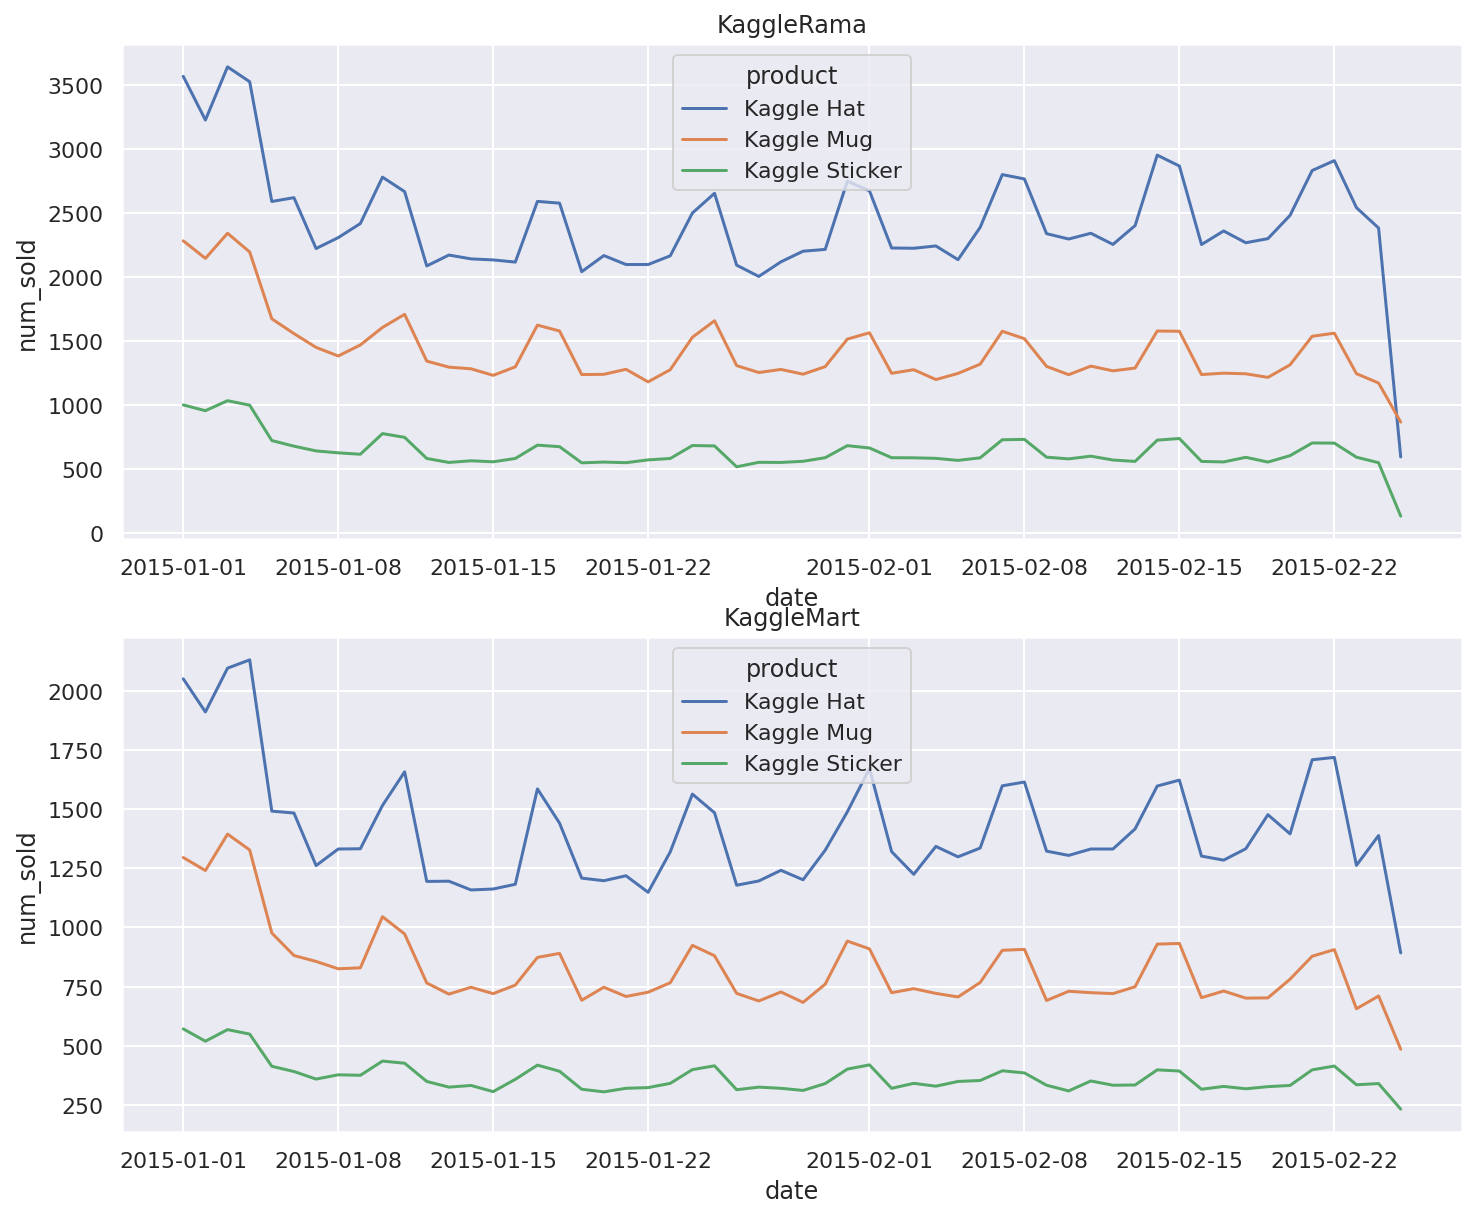

In [5]:
# Subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Groupby
KR=train[train.store=='KaggleRama']
KM=train[train.store=='KaggleMart']
bb=KR.groupby(['date','product']).agg(num_sold=('num_sold','sum'))
cc=KM.groupby(['date','product']).agg(num_sold=('num_sold','sum'))

# Lineplots
ax1=sns.lineplot(ax=axes[0], data=bb, x='date', y='num_sold', hue='product')
ax2=sns.lineplot(ax=axes[1], data=cc, x='date', y='num_sold', hue='product')

# Aesthetics
ax1.title.set_text('KaggleRama')
ax2.title.set_text('KaggleMart')

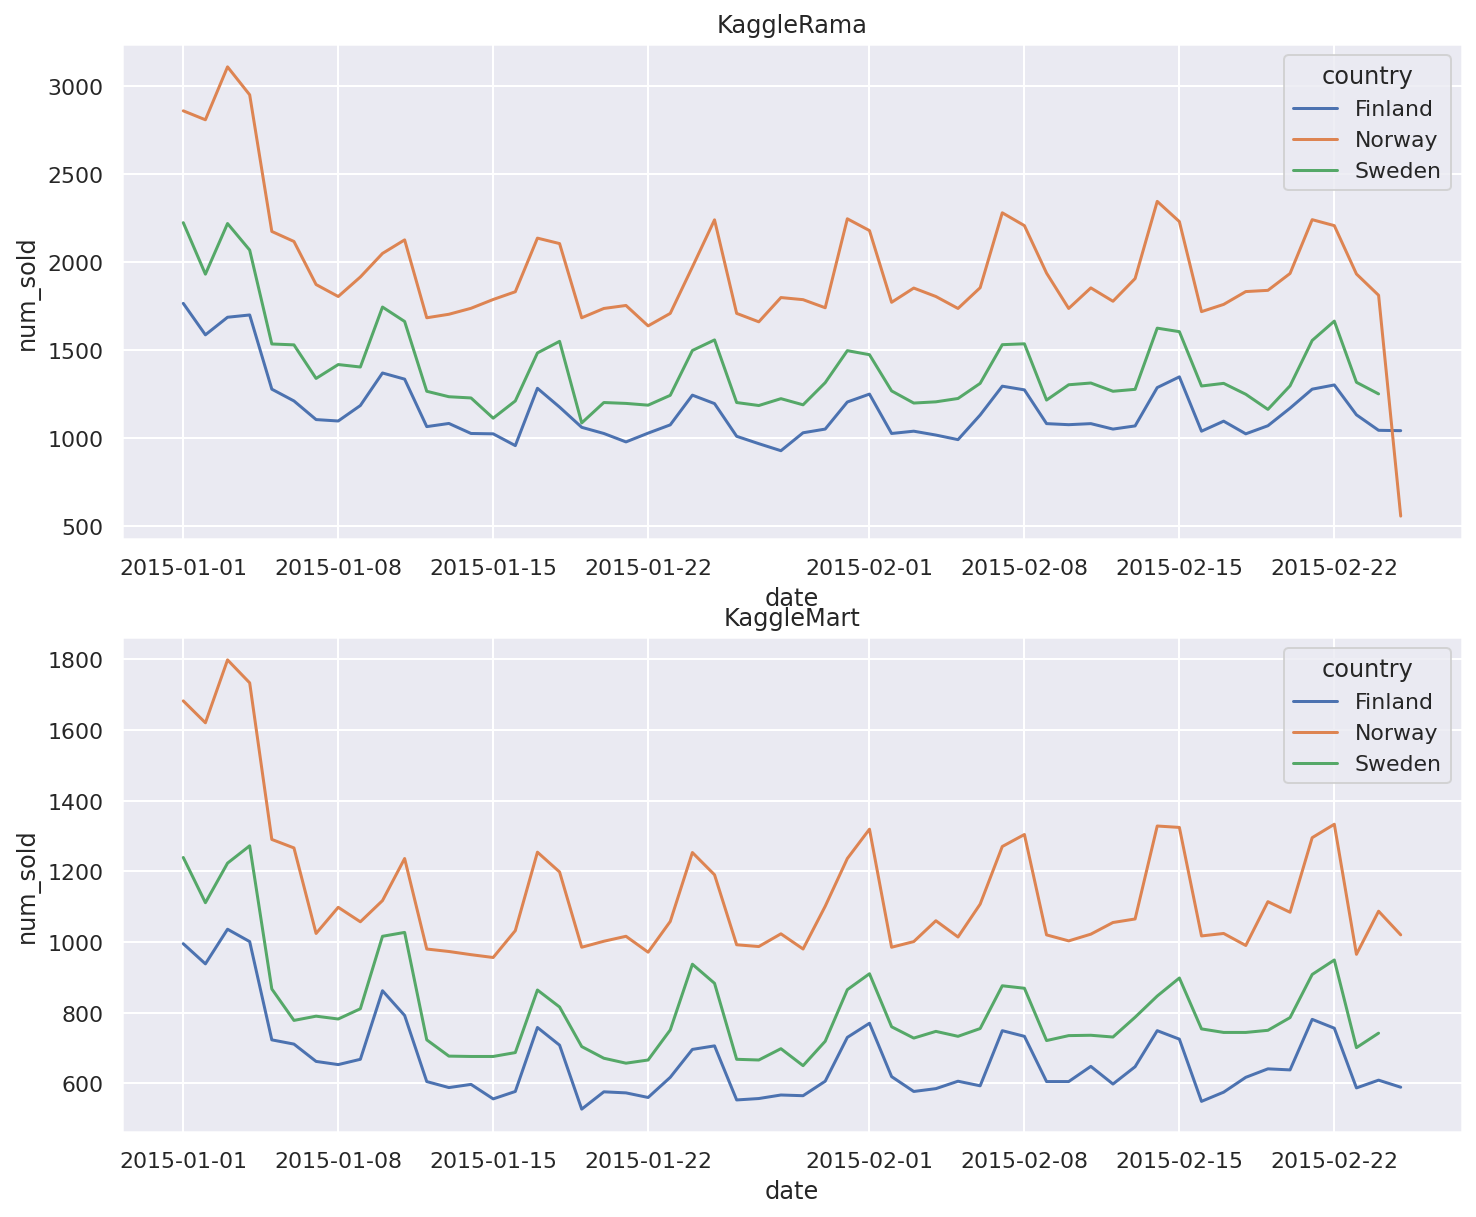

In [6]:
# Subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Groupby
dd=KR.groupby(['date','country']).agg(num_sold=('num_sold','sum'))
ee=KM.groupby(['date','country']).agg(num_sold=('num_sold','sum'))

# Lineplots
ax1=sns.lineplot(ax=axes[0], data=dd, x='date', y='num_sold', hue='country')
ax2=sns.lineplot(ax=axes[1], data=ee, x='date', y='num_sold', hue='country')

# Aesthetics
ax1.title.set_text('KaggleRama')
ax2.title.set_text('KaggleMart')

## Feature engineering

In [7]:
oe = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=["country"],
)

ohe = OneHotEncoder(
    top_categories=10,
    drop_last=True,
    variables=["store", "product"]
)
    
train = ohe.fit_transform(train)
test = ohe.fit_transform(test)

train = oe.fit_transform(train)
test = oe.fit_transform(test)

X_train = train.drop(columns="num_sold")
#y_train = train.groupby("date", "country")["num_sold"].sum()

X_train.head()

,date,country,store_KaggleMart,store_KaggleRama,product_Kaggle Mug,product_Kaggle Hat,product_Kaggle Sticker
0,2015-01-01,0,1,0,1,0,0
1,2015-01-01,0,1,0,0,1,0
2,2015-01-01,0,1,0,0,0,1
3,2015-01-01,0,0,1,1,0,0
4,2015-01-01,0,0,1,0,1,0


In [8]:
extraction_settings = ComprehensiveFCParameters()

X_train_ = extract_features(X_train, column_id='date', column_sort='country',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)

X_train_.head()
#X_filtered = select_features(X_train_, y)
#print(X_.shape, y.shape, X_filtered.shape)

Feature Extraction: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]


store_KaggleMart__variance_larger_than_standard_deviation  \
2015-01-01                                                0.0           
2015-01-02                                                0.0           
2015-01-03                                                0.0           
2015-01-04                                                0.0           
2015-01-05                                                0.0           

            store_KaggleMart__has_duplicate_max  \
2015-01-01                                  1.0   
2015-01-02                                  1.0   
2015-01-03                                  1.0   
2015-01-04                                  1.0   
2015-01-05                                  1.0   

            store_KaggleMart__has_duplicate_min  \
2015-01-01                                  1.0   
2015-01-02                                  1.0   
2015-01-03                                  1.0   
2015-01-04                                  1.0   
2015-01-05                                  1.0   

            store_KaggleMart__has_duplicate  store_KaggleMart__sum_values  \
2015-01-01                              1.0                           9.0   
2015-01-02                              1.0                           9.0   
2015-01-03                              1.0                           9.0   
2015-01-04                              1.0                           9.0   
2015-01-05                              1.0                           9.0   

            store_KaggleMart__abs_energy  store_KaggleMart__mean_abs_change  \
2015-01-01                           9.0                           0.176471   
2015-01-02                           9.0                           0.176471   
2015-01-03                           9.0                           0.176471   
2015-01-04                           9.0                           0.176471   
2015-01-05                           9.0                           0.176471   

            store_KaggleMart__mean_change  \
2015-01-01                      -0.058824   
2015-01-02                      -0.058824   
2015-01-03                      -0.058824   
2015-01-04                      -0.058824   
2015-01-05                      -0.058824   

            store_KaggleMart__mean_second_derivative_central  \
2015-01-01                                               0.0   
2015-01-02                                               0.0   
2015-01-03                                               0.0   
2015-01-04                                               0.0   
2015-01-05                                               0.0   

            store_KaggleMart__median  store_KaggleMart__mean  \
2015-01-01                       0.5                     0.5   
2015-01-02                       0.5                     0.5   
2015-01-03                       0.5                     0.5   
2015-01-04                       0.5                     0.5   
2015-01-05                       0.5                     0.5   

            store_KaggleMart__length  store_KaggleMart__standard_deviation  \
2015-01-01                      18.0                                   0.5   
2015-01-02                      18.0                                   0.5   
2015-01-03                      18.0                                   0.5   
2015-01-04                      18.0                                   0.5   
2015-01-05                      18.0                                   0.5   

            store_KaggleMart__variation_coefficient  \
2015-01-01                                      1.0   
2015-01-02                                      1.0   
2015-01-03                                      1.0   
2015-01-04                                      1.0   
2015-01-05                                      1.0   

            store_KaggleMart__variance  store_KaggleMart__skewness  \
2015-01-01                        0.25                         0.0   
2015-01-02                        0.25  